```{contents}
```


## Intiution

### 1. Linear model as a starting point

We begin with a linear combination of features:

$$
z = \theta_0 + \theta_1x_1 + \theta_2x_2 + \dots + \theta_nx_n
$$

This is the same form as linear regression. But if used directly, $z$ can take any value $(-∞, +∞)$, which is unsuitable for probabilities.

---

### 2. Sigmoid transformation

To map $z$ into a probability range $[0,1]$, we apply the **sigmoid function**:

$$
h_\theta(x) = \sigma(z) = \frac{1}{1+e^{-z}}
$$

* If $z \to +∞$, then $h_\theta(x) \to 1$.
* If $z \to -∞$, then $h_\theta(x) \to 0$.
* If $z = 0$, then $h_\theta(x) = 0.5$.

Thus, $h_\theta(x)$ is interpreted as:

$$
P(y=1|x;\theta) = h_\theta(x), \quad P(y=0|x;\theta) = 1-h_\theta(x)
$$

---

### 3. Decision boundary

Classification rule:

$$
\hat{y} = 
\begin{cases} 
1 & \text{if } h_\theta(x) \geq 0.5 \\
0 & \text{if } h_\theta(x) < 0.5 
\end{cases}
$$

The boundary is where $h_\theta(x) = 0.5 \implies z=0$.
So the decision boundary is the linear equation:

$$
\theta_0 + \theta_1x_1 + \theta_2x_2 + \dots + \theta_nx_n = 0
$$

---

### 4. Likelihood function

We model the probability of observed labels using Bernoulli distribution:

$$
P(y|x;\theta) = [h_\theta(x)]^y \cdot [1-h_\theta(x)]^{(1-y)}
$$

For a dataset of $m$ samples:

$$
L(\theta) = \prod_{i=1}^m \Big(h_\theta(x^{(i)})^{y^{(i)}} \cdot (1-h_\theta(x^{(i)}))^{(1-y^{(i)})}\Big)
$$

This is the **likelihood function**.

---

### 5. Log-likelihood and Cost function

We maximize log-likelihood, which is equivalent to minimizing **Log Loss**:

$$
J(\theta) = -\frac{1}{m}\sum_{i=1}^m \Big[y^{(i)} \log(h_\theta(x^{(i)})) + (1-y^{(i)}) \log(1-h_\theta(x^{(i)}))\Big]
$$

This function is convex → guarantees a unique global minimum.

---

### 6. Optimization via Gradient Descent

We update parameters by computing partial derivatives of cost:

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

where

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^m \big(h_\theta(x^{(i)}) - y^{(i)}\big) x_j^{(i)}
$$

---

✅ **Intuition recap**:

* Linear regression gives unbounded outputs.
* Logistic regression applies sigmoid to convert outputs into valid probabilities.
* Probabilities are learned by maximizing likelihood → equivalent to minimizing log loss.
* Gradient descent finds parameters that minimize cost.



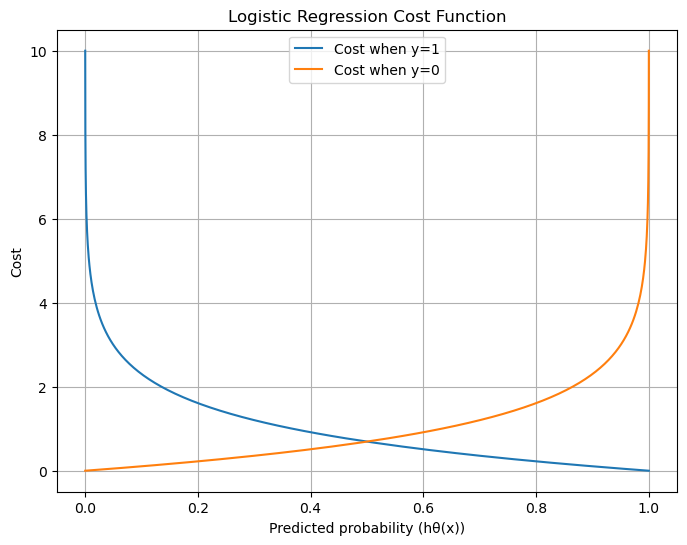

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define cost when y = 1 and y = 0
z = np.linspace(-10, 10, 200)
h = sigmoid(z)

cost_y1 = -np.log(h)          # Cost when y=1
cost_y0 = -np.log(1 - h)      # Cost when y=0

# Plotting
plt.figure(figsize=(8,6))
plt.plot(h, cost_y1, label="Cost when y=1")
plt.plot(h, cost_y0, label="Cost when y=0")
plt.xlabel("Predicted probability (hθ(x))")
plt.ylabel("Cost")
plt.title("Logistic Regression Cost Function")
plt.legend()
plt.grid(True)
plt.show()


Here is the plot of the **Logistic Regression cost function**.

* When **y = 1**, cost is low if predicted probability $h_\theta(x)$ is close to 1, but grows sharply as prediction nears 0.
* When **y = 0**, cost is low if prediction is near 0, but grows sharply as prediction nears 1.

This shows why the log loss strongly penalizes confident wrong predictions.

Do you want me to also plot the **overall convex cost surface $J(\theta)$** for a simple dataset so you can see how Gradient Descent finds the global minimum?
